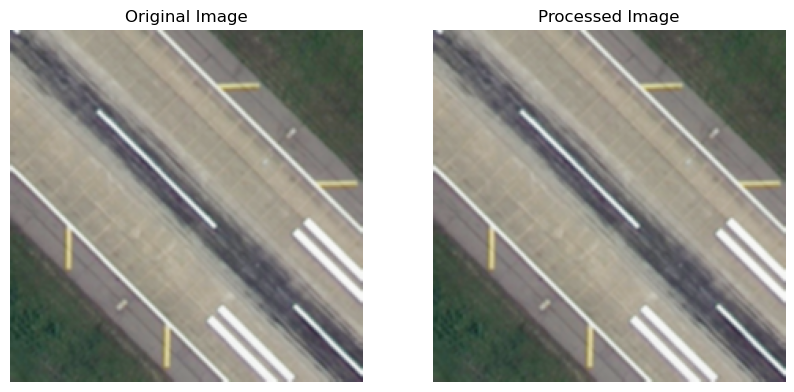

In [2]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def preprocess_image(image_path, size=(224, 224)):
    img = Image.open(image_path)
    
    # Quality enhancement
    enhancer = ImageEnhance.Sharpness(img)
    img = enhancer.enhance(2.0)  # Increase sharpness
    
    # Noise reduction
    image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Consistency
    img = img.resize(size, Image.LANCZOS)
    
    # Normalization
    img_array = np.array(img) / 255.0
    
    # Convert back to image
    processed_img = Image.fromarray((img_array * 255).astype(np.uint8))
    
    return img, processed_img

def show_images(original_img, processed_img):
    # Displaying images
    plt.figure(figsize=(10, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis('off')
    
    # Processed image
    plt.subplot(1, 2, 2)
    plt.title("Processed Image")
    plt.imshow(processed_img)
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = "images_train_test_val/test/runway/runway_000029.png"
original_img, processed_img = preprocess_image(image_path)
show_images(original_img, processed_img)
